In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import pandas as pd
df = pd.read_csv('./Train.csv')
print(df.head())

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       0.0          0         0       4   2   2           0   73
1        0       1.2          1         0       4   2   2           1   73
2        1       1.8          1         0       4   1   2           0   53
3        0       0.0          1         0       4   2   2           0   57
4        1      52.0          1         1       6   4   3           0   65


In [2]:
Label = df['Relapse']
InputFeature = df[["CEA_Post", "Lymphatic", "Vascular", "pStage", "pT", "pN", "Perineural", "Age"]]

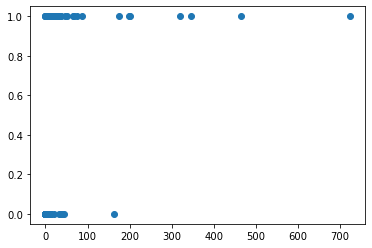

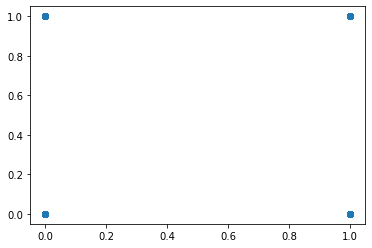

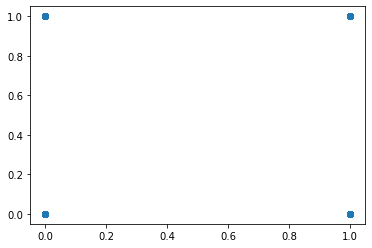

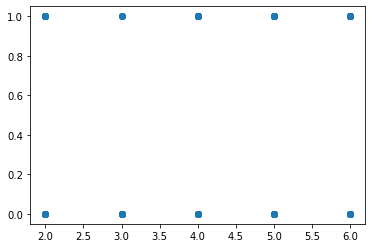

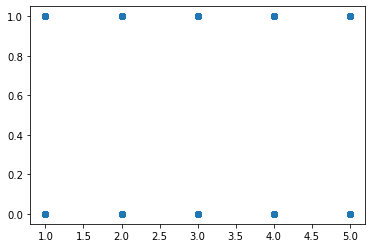

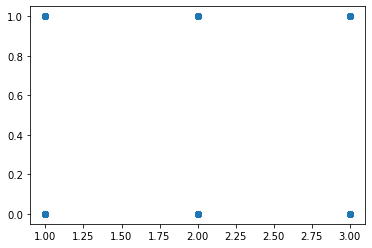

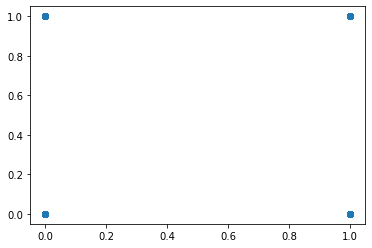

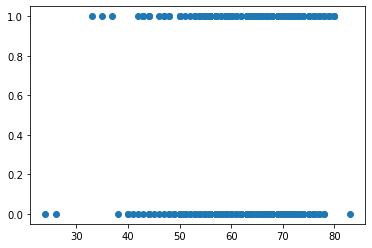

In [5]:
plt.plot(InputFeature['CEA_Post'], Label, 'o')
plt.show()

plt.plot(InputFeature['Lymphatic'], Label, 'o')
plt.show()

plt.plot(InputFeature['Vascular'], Label, 'o')
plt.show()

plt.plot(InputFeature['pStage'], Label, 'o')
plt.show()

plt.plot(InputFeature['pT'], Label, 'o')
plt.show()

plt.plot(InputFeature['pN'], Label, 'o')
plt.show()

plt.plot(InputFeature['Perineural'], Label, 'o')
plt.show()

plt.plot(InputFeature['Age'], Label, 'o')
plt.show()

In [6]:
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(Label, InputFeature)

# Linear Regression
model = model.fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.614428
         Iterations 8
const        -1.969500
CEA_Post      0.018205
Lymphatic     0.639076
Vascular      0.582773
pStage       -0.159252
pT            0.240697
pN            0.511047
Perineural    0.304236
Age          -0.003822
dtype: float64


C:\Users\autot\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
print( model.summary() )

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      383
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.09721
Time:                        16:12:46   Log-Likelihood:                -240.86
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.785e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9695      0.828     -2.378      0.017      -3.593      -0.346
CEA_Post       0.0182      0.009      2.127      0.033       0.001       0.035
Lymphatic      0.6391      0.261      2.445      0.0

## Logisitc Regression 모델 해석하기
Coefficient: ln ( odds ) = 0.0182 * CEA_Post  +  0.6391 * Lymphatic + 0.5828 * Vascular  + constant

In [10]:
model_Label = df['Relapse']
model_InputFeature = df[["CEA_Post", "Lymphatic", "Vascular"]]

In [25]:
model_InputFeature = sm.add_constant(model_InputFeature)
model_selected = sm.Logit(model_Label, model_InputFeature)

# Linear Regression
model_selected = model_selected.fit()
print(model_selected.params)
np.exp(model_selected.params).round(4)
print(model_selected.params)

Optimization terminated successfully.
         Current function value: 0.624307
         Iterations 8
const       -1.355166
CEA_Post     0.022418
Lymphatic    0.778481
Vascular     0.699905
dtype: float64
const       -1.355166
CEA_Post     0.022418
Lymphatic    0.778481
Vascular     0.699905
dtype: float64


In [26]:
print( model_selected.summary() )

                           Logit Regression Results                           
Dep. Variable:                Relapse   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Apr 2022   Pseudo R-squ.:                 0.08269
Time:                        16:42:01   Log-Likelihood:                -244.73
converged:                       True   LL-Null:                       -266.79
Covariance Type:            nonrobust   LLR p-value:                 1.421e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3552      0.227     -5.972      0.000      -1.800      -0.910
CEA_Post       0.0224      0.009      2.388      0.017       0.004       0.041
Lymphatic      0.7785      0.246      3.160      0.0

In [27]:
np.exp(model_selected.params).round(4)

const        0.2579
CEA_Post     1.0227
Lymphatic    2.1782
Vascular     2.0136
dtype: float64

In [28]:
model_selected.predict(model_InputFeature).head()

0    0.205027
1    0.365915
2    0.369041
3    0.359696
4    0.783966
dtype: float64

In [29]:
df_val = pd.read_csv('./Valid.csv')
print(df_val.head())

   Relapse  CEA_Post  Lymphatic  Vascular  pStage  pT  pN  Perineural  Age
0        0       1.2          1         0       5   1   3           0   42
1        1       1.0          1         0       4   2   2           0   45
2        1       9.2          1         0       6   4   3           0   69
3        1       0.0          0         0       5   5   1           0   64
4        0       2.3          1         1       5   1   3           0   72


In [32]:
val_Label = df_val['Relapse']
val_InputFeature = df_val[["CEA_Post", "Lymphatic", "Vascular"]]
val_InputFeature = sm.add_constant(val_InputFeature)

In [33]:
model_selected.predict(val_InputFeature).head()

0    0.365915
1    0.364875
2    0.408434
3    0.205027
4    0.543584
dtype: float64

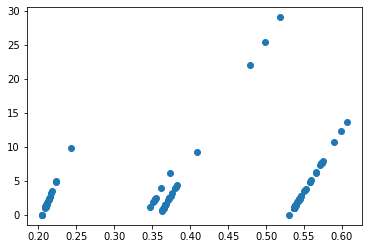

In [38]:
plt.plot(model_selected.predict(val_InputFeature), df_val['CEA_Post'], 'o')
plt.show()

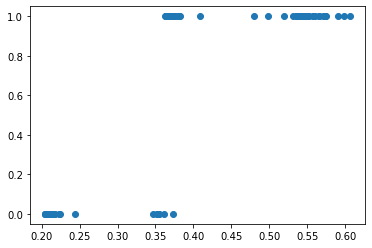

In [39]:
plt.plot(model_selected.predict(val_InputFeature), df_val['Lymphatic'], 'o')
plt.show()

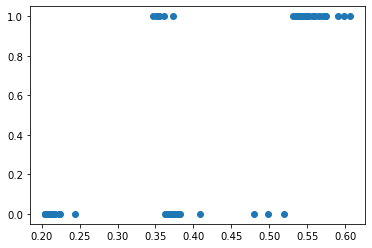

In [40]:
plt.plot(model_selected.predict(val_InputFeature), df_val['Vascular'], 'o')
plt.show()